# **第2章：確率分布の基本**
統計モデルは**確率分布（probability distribution）**を組み合わせることによって設計します．
ここでは使用頻度の高い代表的な確率分布をいくつか紹介します．

## **2.1 確率質量関数と確率密度関数**
確率分布は，離散値の場合は**確率質量関数（probability mass function）**，連続値の場合は**確率密度関数（probability density function）**によってその性質が決定されます．

#### **確率質量関数**
- 確率は0より多くなければいけない。全部の確率を足すと1にならなければいけない。
$$
p(x) \geq 0 \\
\sum_x p(x) = 1
$$

例）次のようなベルヌーイ分布の確率質量関数を考えます．($ x \in \{0, 1\} , \mu \in (0, 1)$)
- 二項分布の場合は何回も試行をするが、ベルヌーイは試行回数1回

$$
{\rm Bernoulli}(x|\mu) = \mu^x (1 - \mu)^{1-x}
$$

上記は確率質量関数としての性質を満たしています．
なぜなら
$$
{\rm Bernulli}(x|\mu) \geq 0
$$
かつ
$$
\sum_{x}{\rm Bernulli}(x|\mu) = {\rm Bernulli}(x=0|\mu) + {\rm Bernulli}(x=1|\mu) = (1 - \mu) + \mu = 1
$$
だからです．

#### **確率密度関数**

$$
p(x) \geq 0 \\
\int p(x) {\rm d}x = 1
$$

例）次のような**ガウス分布（Gaussian distribution）**あるいは**正規分布（normal distribution）**の確率密度関数を考えます．($ x \in \mathbb{R} , \mu \in \mathbb{R}, \sigma > 0$)

$$
{\rm Normal}(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} {\rm exp} \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

上記は確率密度関数としての性質を満たしています．

#### **2.1 やってみよう(5分)**
**一様分布（uniform distribution）**が確率密度関数としての性質を満たすことを確認してください．（$x \in \lbrack a, b \rbrack$，$b > a$）
$$
{\rm Uni}(x|a,b) = \frac{1}{b-a}
$$


## **2.2 いろいろな確率分布を調べてみる**

ここでは様々な基本的な確率分布を紹介します．
確率分布の性質を知る方法は

**１． プロットして概形を描いてみる．**

**２． 値をシミュレーション（=サンプリング）してみる．**

**３． （平均や分散などの）量を計算してみる．**

などです．やってみましょう．

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 代表的な確率分布が揃っているライブラリ
import scipy.stats as stats

#### **一様分布（uniform distribution）**
最も基本的な連続確率分布の1つです．$x \in (a, b)$を満たす実数値をランダムに抽出します（$b>a$）．
$$
{\rm Uniform}(x|a,b) = \frac{1}{b-a}
$$

In [2]:
# 2から5までの連続値を生成する一様分布を定義
# scipy.statsでの一様分布の定義はstats.uniform(a, b-a)、第二引数最大値なのだが、Scypyの仕様でB-aを入力しなければいけない。
uni_dist = stats.uniform(2, 5-2)

In [12]:
# 定義した一様分布から100個のサンプルを生成
X = uni_dist.rvs(10000)

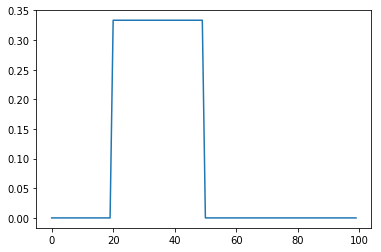

In [17]:
"""
0から10まで100回等分割してサンプルを生成する。つまりサンプル数は分割数と同じ数だけ生成される
np.linspace
(
    0,#スタート
    10,#ゴール
    100# 件数
)
"""
# ls = np.linspace(2, 5, 4)
ls = np.linspace(0, 10, 100)
plt.plot(uni_dist.pdf(ls))

#確率密度変数の場合
# uni_dist.pdf(ls)

(array([ 982., 1000., 1011.,  992., 1033., 1024., 1005.,  979.,  974.,
        1000.]),
 array([2.00029531, 2.30026033, 2.60022535, 2.90019037, 3.20015539,
        3.50012041, 3.80008543, 4.10005045, 4.40001547, 4.69998049,
        4.99994551]),
 <a list of 10 Patch objects>)

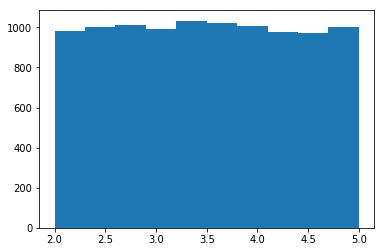

In [14]:
plt.hist(X, bins=10)

#### **1次元ガウス分布（正規分布）**

いわゆる「釣り鐘型」の連続分布で，**正規分布（normal distribution）**とも呼ばれます．パラメータは平均値$\mu$および標準偏差$\sigma$の2つです．また，$\sigma^2$はこの分布の分散になる．
$$
{\rm Normal}(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} {\rm exp} \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

#### **やってみよう（10分）**
- 1次元ガウス分布（正規分布）を定義し，以下を行ってください．
  - 1000個のサンプルを生成し，ヒストグラムを描いてみてください．
  - 確率密度関数をプロットしてみてください
  - パラメータをいくつか変えてみて確率密度関数を複数プロットしてみてください．
- ヒント：
  - 正規分布の作成は```stats.norm(μ, σ)```


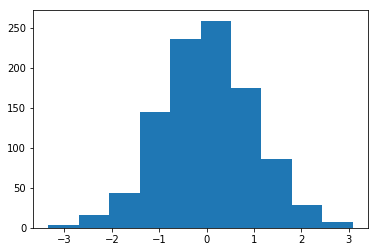

In [33]:
def norm_viz(u,siguma):
    # μ=0, σ=1のガウス分布を定義
    u = u
    siguma = siguma
    normal_dist = stats.norm(u,siguma)# Enter here

    # 定義したガウス分布から1000個のサンプルを生成
    X = normal_dist.rvs(size=1000)
    # X = np.linspace(0,10000,1000)# Enter here

    # ヒストグラムを描く
    plt.hist(X, bins=10)
norm_viz(0,1)

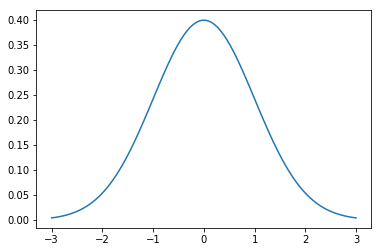

In [42]:
# 確率密度関数をプロットする
ls = np.linspace(-3, 3, 100)
plt.plot(ls, normal_dist.pdf(ls))


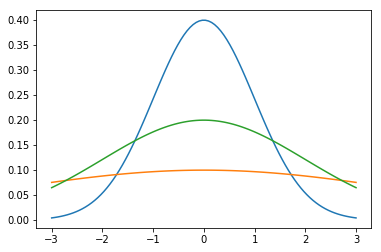

In [40]:
# 標準偏差を変えてガウス分布をプロットしてみる
def gaus_viz(u,siguma):
    normal_dist = stats.norm(u,siguma)# Enter here
    ls = np.linspace(-3, 3, 100)
    plt.plot(ls, normal_dist.pdf(ls))
gaus_viz(0,1)
gaus_viz(0,4)
gaus_viz(0,2)

#### **ベルヌーイ分布（Bernoulli distribution）**
いわゆる「ひしゃげたコイン」の分布です．確率$\mu \in (0, 1)$で値$x=1$を取り，確率$1 - \mu$で値$x=0$を取ります．

$$
{\rm Bernulli}(x|\mu) = \mu^x (1 - \mu)^{1-x}
$$

In [45]:
# 1が出る確率がμ=0.2のベルヌーイ分布を定義。μはコインでいうと表が出る確率
ber_dist = stats.bernoulli(0.2)

In [46]:
# 定義したベルヌーイ分布から100個のサンプルを生成
X = ber_dist.rvs(100)
X

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [47]:
# シードを固定すると，毎回同じサンプルが得られる
np.random.seed(0) #Scypyの裏ではNumpyが動いているのでNumpyでシード固定ができる
ber_dist.rvs(20)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [48]:
# セルを変えるとシード固定は解除される
ber_dist.rvs(10)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [50]:
# 関数pmf()で確率質量関数（Probability Mass Function）の値を計算できる
print(ber_dist.pmf(0))#コインの裏
print(ber_dist.pmf(1))#コインの表
print(ber_dist.pmf(0.5))#離散値じゃない値を入れた場合は0が返される

0.8
0.2
0.0


In [54]:
#補足。似てる関数の出力の違い
print(np.linspace(0,100,2))
print(np.arange(0,100,2))
print(range(0,100,2))

[  0. 100.]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]
range(0, 100, 2)


<BarContainer object of 2 artists>

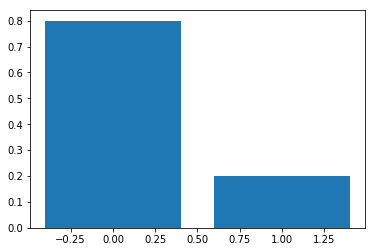

In [51]:
# 確率質量関数のプロット 左が裏が出る確率、右が表が出る確率
ar = np.arange(0, 2)#pythonのrangeの場合は、第3引数にFloat型が取れないが、numpyの場合はarangeとれる
plt.bar(ar, ber_dist.pmf(ar))

#### **カテゴリ分布（categorical distribution）**
- 多項分布の試行回数が1回なのがカテゴリ分布。ベルヌーイ分布はコインの裏表だけだけど、カテゴリ分布は3個以上を取れる。ちなみにScpyにカテゴリ分布そのものの関数はない

いわゆる「ひしゃげたサイコロ」の分布で，試行回数$M=1$の**多項分布（multinominal distribution）**とも呼ばれます．また，カテゴリ分布はベルヌーイ分布の3値以上の拡張であるとも言えます．確率$\pi = \{\pi_0, \pi_1, \ldots, \pi_{K-1} \}$に応じて出目$x \in \{0, 1, \ldots, K-1 \}$が決定されます．（$\pi_i > 0, \sum_{i=0}^{K-1} \pi_i = 1$）

$$
{\rm Categorical}(x|\pi) = \pi_x
$$

$x$の表現方法として，**one-hot表現**もあります．
例えば$K=6$で$x=2$は

$$
x_{\rm onehot} = (0, 0, 1, 0, 0, 0)^{\rm T}
$$
のように$K$次元ベクトルで表されます．

In [58]:
# M=1とした多項分布としてカテゴリ分布を定義（p=[0.1, 0.2, 0.3, 0.4]）
cat_dist = stats.multinomial(n=1, p=[0.1, 0.2, 0.3, 0.4])

# K = 4　カテゴリの数
K = len(cat_dist.p)

# 定義したカテゴリ分布から100個のサンプルを生成
X_onehot = cat_dist.rvs(100)
X_onehot[:5]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [60]:
# one-hot表現からカテゴリに変換する
X = [np.argmax(x) for x in X_onehot] #X_onehotの値をargmaxで値が最も大きいIndex番号をひろってくる
X[:5]

[2, 2, 1, 1, 2]

(array([ 8., 28., 26., 38.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

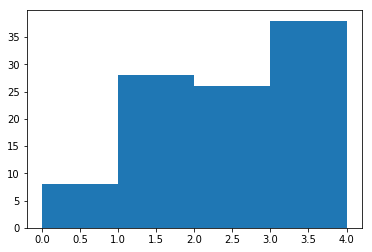

In [61]:
# ヒストグラムを描く（Kに応じてbinsの値を設定）
plt.hist(X, bins=range(K+1))

In [64]:
# 確率質量関数を計算する　X→onehotに表現したい場合
# 0,1,...,K-1のone-hot表現
X_tmp = np.identity(K)[range(K)]
X_tmp

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<BarContainer object of 4 artists>

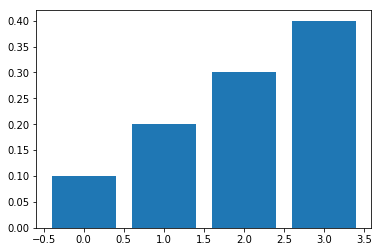

In [63]:
# 確率質量関数をプロットする
plt.bar(range(K), cat_dist.pmf(X_tmp))

#### **二項分布（binomial distribution）**
ベルヌーイ分布の多試行版です．すなわち，$M$個のひしゃげたコインを振ります．
コインの表が出る確率は$\mu \in (0, 1)$で与えられます．
確率質量関数は，次のようにコインの表が出た回数$x$の関数になります．

$$
{\rm Binomial}(x|\mu, M) = _M \mathbb{C}_x \mu^x (1 - \mu)^{M-x}
$$

#### **やってみよう（10分）**
- 二項分布を定義し，以下を行ってください．
  - 1000個のサンプルを生成し，ヒストグラムを描いてみてください．
  - 生成したサンプルの平均と分散を計算してください
  - 確率質量関数をプロットしてみてください
  - パラメータをいくつか変えてみて確率質量関数を複数プロットしてみてください．


In [99]:
# 試行回数M=8，μ=0.2の二項分布を定義
def def_binom(M,mu):
    binom_dist = stats.binom(M,mu)
    # 定義された二項分布からサンプルを100個生成
    X = binom_dist.rvs(100)
    return binom_dist,X
binom_dist,X = def_binom(8,0.2)

meam:1.52
variance:1.3496000000000001


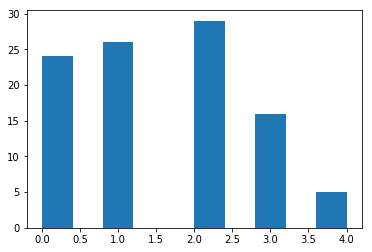

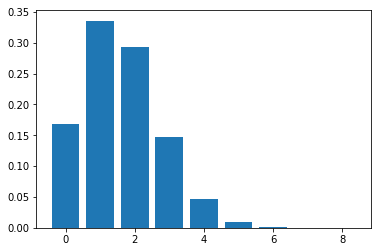

In [103]:
def binom_viz(X):
    # ヒストグラムを作成
    # ヒストグラムを描く
    plt.figure()
    plt.hist(X)
    # サンプルから平均を計算
    print('meam:{}'.format(X.mean()))
    # サンプルから分散を計算
    print('variance:{}'.format(X.var()))

    plt.figure()
    # 確率質量関数のプロット
    K = np.arange(9)
    plt.bar(K, binom_dist.pmf(K))

binom_viz(X)

In [91]:
# 確率質量関数のプロット
plt.bar(range(len(X)), binom_dist.pmf(X))

meam:3.06
variance:1.7164000000000001


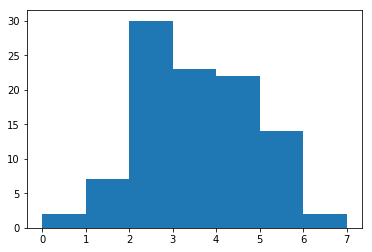

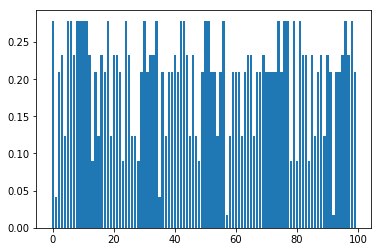

In [96]:
# 二項分布のパラメータを変えてみて，確率質量関数の変化を見てみる
binom_dist,X = def_binom(8,0.4)
binom_viz(X)

#### **ポアソン分布（Poisson distribution）**
ポアソン分布は自然数$x=0, 1, 2, \ldots$に関する分布です．パラメータは$\mu > 0$です．
単位時間あたりにのメール受信数の分布などに用いられます．

$$
{\rm Poisson}(x|\mu) = \frac{\mu^x e^{-\mu}}{x!}
$$

#### **やってみよう（10分）**
- ポアソン分布を定義し，以下を行ってください．
  - 1000個のサンプルを生成し，ヒストグラムを描いてみてください．
  - 生成したサンプルの平均と分散を計算してください
  - 確率質量関数をプロットしてみてください
  - パラメータをいくつか変えてみて確率質量関数を複数プロットしてみてください．

In [ ]:
# μ=3.0のポアソン分布を定義

# 定義されたポアソン分布からサンプルを100個生成

In [ ]:
# ヒストグラムを作成

# サンプルから平均を計算

# サンプル化から分散を計算

In [ ]:
# 確率質量関数のプロット（適当に30で打ち切る）

In [ ]:
# ポアソン分布のパラメータを変えてみて，確率質量関数の変化を見てみる

#### **ベータ分布（beta distribution）**
$x \in (0,1)$を満たす実数値を生成する分布．パラメータは$\alpha > 0$，$\beta>0$の2つ．$\mathcal{B}(\alpha, \beta)$は正規化を保障する定数．
ベータ分布はベルヌーイ分布のパラメータ推定に利用されることが多い．（後述）
$$
{\rm Beta}(x|\alpha, \beta) = \frac{1}{\mathcal{B}(\alpha, \beta)}x^{\alpha-1}(1-x)^{(\beta - 1)}
$$



In [ ]:
stats.beta(2,5) #コインの表が出る確率が2-1=1回、裏が出る確率が5-1=4回という意味。

#### **ガンマ分布（Gamma distribution）**
$x > 0$を満たす実数値を生成する分布．パラメータは$\alpha > 0$，$\beta>0$の2つ．$\mathcal{G}(\alpha, \beta)$は正規化を保障する定数．
ガンマ分布はポアソン分布のパラメータ推定に利用されることが多い．（後述）
$$
{\rm Gamma}(x|\alpha, \beta) = \frac{1}{\mathcal{G}(\alpha, \beta)}x^{\alpha-1}{\rm exp}(-\beta x)
$$



#### **やってみよう（10分）**
- ベータ分布およびガンマ分布をそれぞれ定義し，以下を行ってください．
  - 1000個のサンプルを生成し，ヒストグラムを描いてみてください．
  - パラメータをいくつか変えてみて確率密度関数を複数プロットしてみてください．
- ヒント：
  - ベータ分布の作成は```stats.beta(α, β)```
  - ガンマ分布の作成は```stats.gamma(a=α, scale=1/β)```
